In [1]:

!pip install clodsa


In [3]:
pip uninstall protobuf

Found existing installation: protobuf 6.31.1
Uninstalling protobuf-6.31.1:
  Would remove:
    /opt/homebrew/lib/python3.11/site-packages/google/_upb/_message.abi3.so
    /opt/homebrew/lib/python3.11/site-packages/google/protobuf/*
    /opt/homebrew/lib/python3.11/site-packages/protobuf-6.31.1.dist-info/*
Proceed (Y/n)? ^C
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install protobuf==3.20.3

  Attempting uninstall: protobuf
    Found existing installation: protobuf 6.31.1
    Uninstalling protobuf-6.31.1:
      Successfully uninstalled protobuf-6.31.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
grpcio-status 1.74.0 requires protobuf<7.0.0,>=6.31.1, but you have protobuf 3.20.3 which is incompatible.

[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: /opt/homebrew/opt/python@3.11/bin/python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [5]:
from matplotlib import pyplot as plt
from clodsa.augmentors.augmentorFactory import createAugmentor
from clodsa.transformers.transformerFactory import transformerGenerator
from clodsa.techniques.techniqueFactory import createTechnique
import xml.etree.ElementTree as ET
import cv2
%matplotlib inline

In [6]:
PROBLEM = "detection"
ANNOTATION_MODE = "yolo"
INPUT_PATH = "PascalVOCYOLO/"
GENERATION_MODE = "linear"
OUTPUT_MODE = "yolo"
OUTPUT_PATH= "augmented_images_yolo"

In [7]:
augmentor = createAugmentor(PROBLEM,ANNOTATION_MODE,OUTPUT_MODE,GENERATION_MODE,INPUT_PATH,{"outputPath":OUTPUT_PATH})

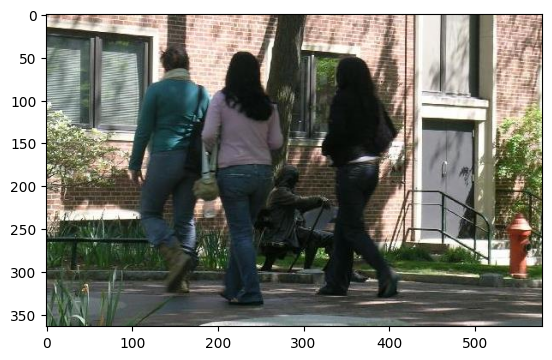

In [13]:
img = cv2.imread("/Users/adarshks/Downloads/PennFudanPed/valid_images/PennPed00073.png")
# changing to the BGR format of OpenCV to RGB format for matplotlib
plt.imshow(img[:,:,::-1])


In [14]:
def boxesFromYOLO(imagePath,labelPath):
    image = cv2.imread(imagePath)
    (hI, wI) = image.shape[:2]
    lines = [line.rstrip('\n') for line in open(labelPath)]
    #if(len(objects)<1):
    #    raise Exception("The xml should contain at least one object")
    boxes = []
    if lines != ['']:
        for line in lines:
            components = line.split(" ")
            category = components[0]
            x  = int(float(components[1])*wI - float(components[3])*wI/2)
            y = int(float(components[2])*hI - float(components[4])*hI/2)
            h = int(float(components[4])*hI)
            w = int(float(components[3])*wI)
            boxes.append((category, (x, y, w, h)))
    return (image,boxes)

In [15]:
categoriesColors = {11: (255,0,0),14:(0,0,255)}

def showBoxes(image,boxes):
    cloneImg = image.copy()
    for box in boxes:
        if(len(box)==2):
            (category, (x, y, w, h))=box
        else:
            (category, (x, y, w, h),_)=box
        if int(category) in categoriesColors.keys():
            cv2.rectangle(cloneImg,(x,y),(x+w,y+h),categoriesColors[int(category)],5)
        else:
            cv2.rectangle(cloneImg,(x,y),(x+w,y+h),(0,255,0),2)
    plt.imshow(cloneImg[:,:,::-1])


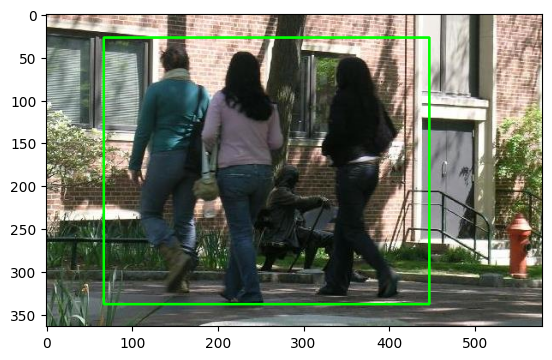

In [22]:
img,boxes = boxesFromYOLO("/Users/adarshks/Downloads/PennFudanPed/valid_images/PennPed00073.png","/Users/adarshks/Downloads/PennFudanPed/valid_images/PennPed00073.txt")
showBoxes(img,boxes)

In [17]:
transformer = transformerGenerator(PROBLEM)

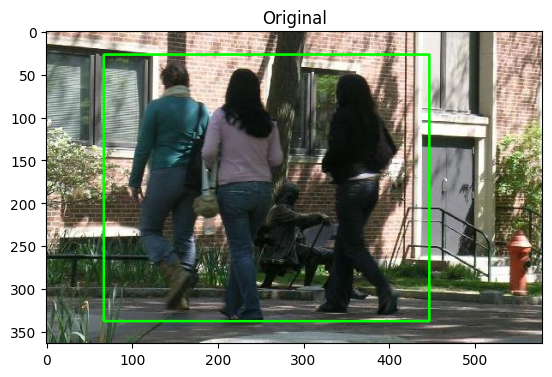

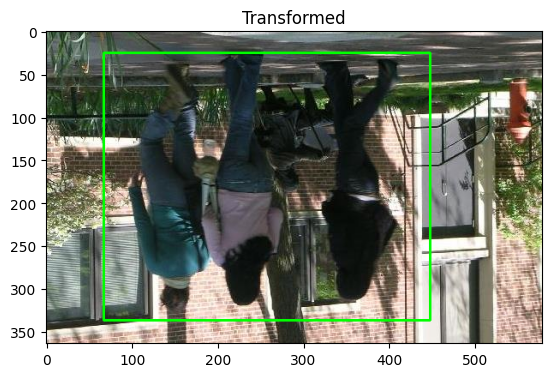

In [18]:
vFlip = createTechnique("flip",{"flip":0})
augmentor.addTransformer(transformer(vFlip))
plt.figure()
plt.title("Original")
showBoxes(img,boxes)
vFlipGenerator = transformer(vFlip)
vFlipImg,vFlipBoxes = vFlipGenerator.transform(img,boxes)
plt.figure()
plt.title("Transformed")
showBoxes(vFlipImg,vFlipBoxes)

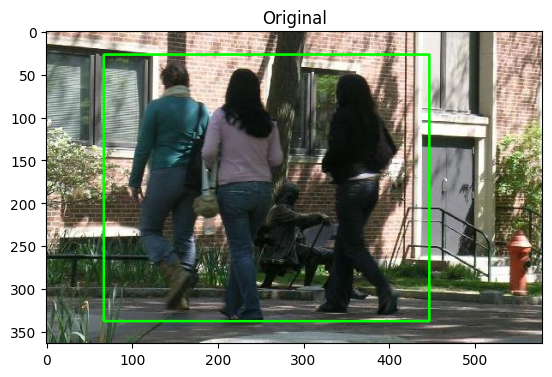

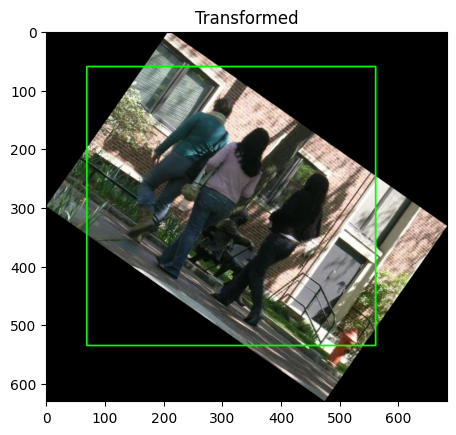

In [23]:
rotate = createTechnique("rotate", {"angle" : 35})
augmentor.addTransformer(transformer(rotate))
plt.figure()
plt.title("Original")
showBoxes(img,boxes)
rotateGenerator = transformer(rotate)
rotateImg,rotateBoxes = rotateGenerator.transform(img,boxes)
plt.figure()
plt.title("Transformed")
showBoxes(rotateImg,rotateBoxes)

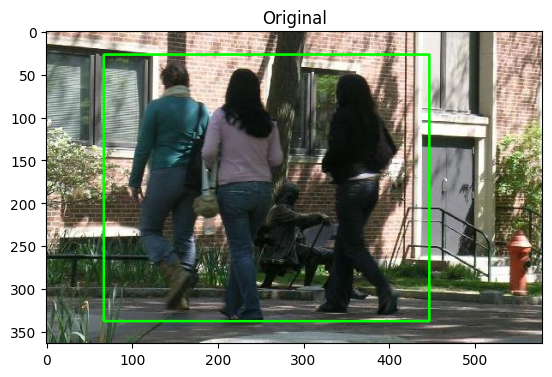

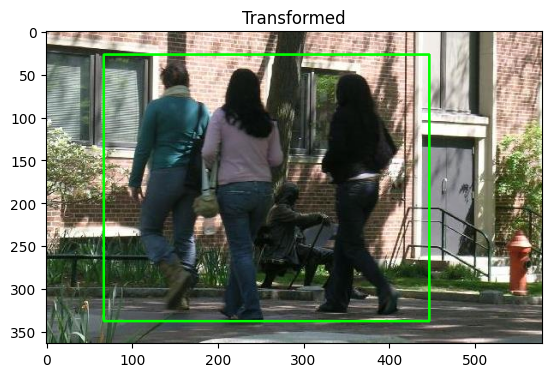

In [24]:
rotate = createTechnique("raise_hue", {"power" : 0.99})
augmentor.addTransformer(transformer(rotate))
plt.figure()
plt.title("Original")
showBoxes(img,boxes)
rotateGenerator = transformer(rotate)
rotateImg,rotateBoxes = rotateGenerator.transform(img,boxes)
plt.figure()
plt.title("Transformed")
showBoxes(rotateImg,rotateBoxes)

In [25]:
none = createTechnique("none",{})
augmentor.addTransformer(transformer(none))

In [26]:
augmentor.applyAugmentation()

In [28]:
!ls

Hackton accu 80.ipynb home.csv              yolov8n.pt
adarsh K S.ipynb      people.ipynb
augmented_images_yolo predictions.ipynb


In [4]:
print("Number of images in the folder")
!ls -1 /Users/adarshks/Downloads/PennFudanPed/augmented_images_yolo/*.png | wc -l
print("Number of annotations in the folder")
!ls -1 /Users/adarshks/Downloads/PennFudanPed/augmented_images_yolo/*.txt | wc -l

Number of images in the folder
      11
Number of annotations in the folder
      10


In [9]:
!ls


Hackton accu 80.ipynb     home.csv                  yolov8n.pt
adarsh K S.ipynb          people.ipynb
augmented_images_yolo.zip predictions.ipynb


In [14]:
!zip -r augmented_images_yolo.zip augmented_images_yolo


	zip warning: name not matched: augmented_images_yolo

zip error: Nothing to do! (try: zip -r augmented_images_yolo.zip . -i augmented_images_yolo)


In [17]:
!pip install albumentations


In [18]:
pip install albumentations


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4/4 [albumentations]

[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: /opt/homebrew/opt/python@3.11/bin/python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [26]:
import os
os.path.exists("/Users/adarshks/Downloads/PennFudanPed/augmented_images_yolo/augmented_images_yolo.zip")


True

In [27]:
# Install required packages
!pip install -q albumentations==1.3.1 opencv-python matplotlib

# Import libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
import albumentations as A
import os
from zipfile import ZipFile
import io
import PIL.Image
import sys

# -----------------------------
# Detect if running in Colab
try:
    from google.colab import files
    IN_COLAB = True
except ImportError:
    IN_COLAB = False

# -----------------------------
# Handle ZIP upload
if IN_COLAB:
    print("Upload a ZIP file containing images and YOLO labels:")
    uploaded = files.upload()
    zip_file = next(iter(uploaded))
    zip_data = io.BytesIO(uploaded[zip_file])
else:
    zip_file_path = "/Users/adarshks/Downloads/PennFudanPed/augmented_images_yolo/augmented_images_yolo.zip"
    print(f"Using local ZIP file: {zip_file_path}")
    zip_data = open(zip_file_path, 'rb')

# -----------------------------
# Unzip contents
with ZipFile(zip_data, 'r') as zip_ref:
    zip_ref.extractall("data")

# -----------------------------
# Create output directory
os.makedirs("augmented", exist_ok=True)

# -----------------------------
# Define augmentations
transformations = [
    A.HorizontalFlip(p=1),
    A.VerticalFlip(p=1),
    A.RandomBrightnessContrast(p=1),
    A.Rotate(limit=30, p=1),
    A.Blur(blur_limit=3, p=1),
    A.RGBShift(p=1)
]

# -----------------------------
# Function to draw bounding boxes (optional, for visualization)
def draw_boxes(img, boxes, labels):
    img_draw = img.copy()
    for box, cls in zip(boxes, labels):
        x1, y1, x2, y2 = map(int, box)
        cv2.rectangle(img_draw, (x1, y1), (x2, y2), (0,255,0), 2)
        cv2.putText(img_draw, str(cls), (x1, y1-5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,255,0), 1)
    return img_draw

# -----------------------------
# Process each image in the folder
image_dir = "data"
image_files = [f for f in os.listdir(image_dir) if f.lower().endswith((".jpg", ".jpeg", ".png"))]

for image_file in image_files:
    base_name = os.path.splitext(image_file)[0]
    label_file = f"{base_name}.txt"
    image_path = os.path.join(image_dir, image_file)
    label_path = os.path.join(image_dir, label_file)

    # Skip if label file doesn't exist
    if not os.path.exists(label_path):
        continue

    # Load image
    img = PIL.Image.open(image_path).convert("RGB")
    img_np = np.array(img)
    height, width = img_np.shape[:2]

    # Load YOLO labels and convert to Pascal VOC
    boxes_yolo = []
    class_ids = []
    with open(label_path, 'r') as f:
        for line in f:
            cls, cx, cy, w, h = map(float, line.strip().split())
            x_min = (cx - w/2) * width
            y_min = (cy - h/2) * height
            x_max = (cx + w/2) * width
            y_max = (cy + h/2) * height
            boxes_yolo.append([x_min, y_min, x_max, y_max])
            class_ids.append(int(cls))

    # Apply each augmentation
    for i, aug in enumerate(transformations, start=1):
        transform = A.Compose([aug], bbox_params=A.BboxParams(format='pascal_voc', label_fields=['class_labels']))
        augmented = transform(image=img_np, bboxes=boxes_yolo, class_labels=class_ids)

        aug_img = augmented['image']
        aug_boxes = augmented['bboxes']
        aug_labels = augmented['class_labels']

        # Convert back to YOLO format
        yolo_lines = []
        for box, cls in zip(aug_boxes, aug_labels):
            x_min, y_min, x_max, y_max = box
            cx = (x_min + x_max) / 2 / width
            cy = (y_min + y_max) / 2 / height
            bw = (x_max - x_min) / width
            bh = (y_max - y_min) / height
            yolo_lines.append(f"{cls} {cx:.6f} {cy:.6f} {bw:.6f} {bh:.6f}")

        # Save augmented image and label
        out_img_name = f"{base_name}_aug{i}.jpg"
        out_lbl_name = f"{base_name}_aug{i}.txt"

        cv2.imwrite(os.path.join("augmented", out_img_name), cv2.cvtColor(aug_img, cv2.COLOR_RGB2BGR))
        with open(os.path.join("augmented", out_lbl_name), 'w') as f:
            f.write("\n".join(yolo_lines))

print("✅ Augmentation complete. Check 'augmented' folder for output files.")


Using local ZIP file: /Users/adarshks/Downloads/PennFudanPed/augmented_images_yolo/augmented_images_yolo.zip
✅ Augmentation complete. Check 'augmented' folder for output files.


/opt/homebrew/lib/python3.11/site-packages/albumentations/core/composition.py:331: UserWarning: Got processor for bboxes, but no transform to process it.
  self._set_keys()


In [28]:
# Install fastai if not already installed
!pip install -q fastai

In [30]:
!pip install -q fastai


In [32]:
import sys
!{sys.executable} -m pip install fastai


  Using cached fastai-2.8.2-py3-none-any.whl.metadata (9.5 kB)
  Using cached fastdownload-0.0.7-py3-none-any.whl.metadata (5.5 kB)
  Using cached fastcore-1.8.7-py3-none-any.whl.metadata (3.7 kB)
  Using cached fasttransform-0.0.2-py3-none-any.whl.metadata (7.6 kB)
  Using cached fastprogress-1.0.3-py3-none-any.whl.metadata (5.6 kB)
  Using cached plum_dispatch-2.5.7-py3-none-any.whl.metadata (7.5 kB)
  Using cached spacy_legacy-3.0.12-py2.py3-none-any.whl.metadata (2.8 kB)
  Using cached spacy_loggers-1.0.5-py3-none-any.whl.metadata (23 kB)
  Using cached wasabi-1.1.3-py3-none-any.whl.metadata (28 kB)
  Using cached catalogue-2.0.10-py3-none-any.whl.metadata (14 kB)
  Using cached weasel-0.4.1-py3-none-any.whl.metadata (4.6 kB)
  Using cached typer-0.16.0-py3-none-any.whl.metadata (15 kB)
  Using cached langcodes-3.5.0-py3-none-any.whl.metadata (29 kB)
  Using cached language_data-1.3.0-py3-none-any.whl.metadata (4.3 kB)
  Using cached confection-0.1.5-py3-none-any.whl.metadata (19 k

In [33]:
from fastai.vision.all import *


Using image: FudanPed00003.png


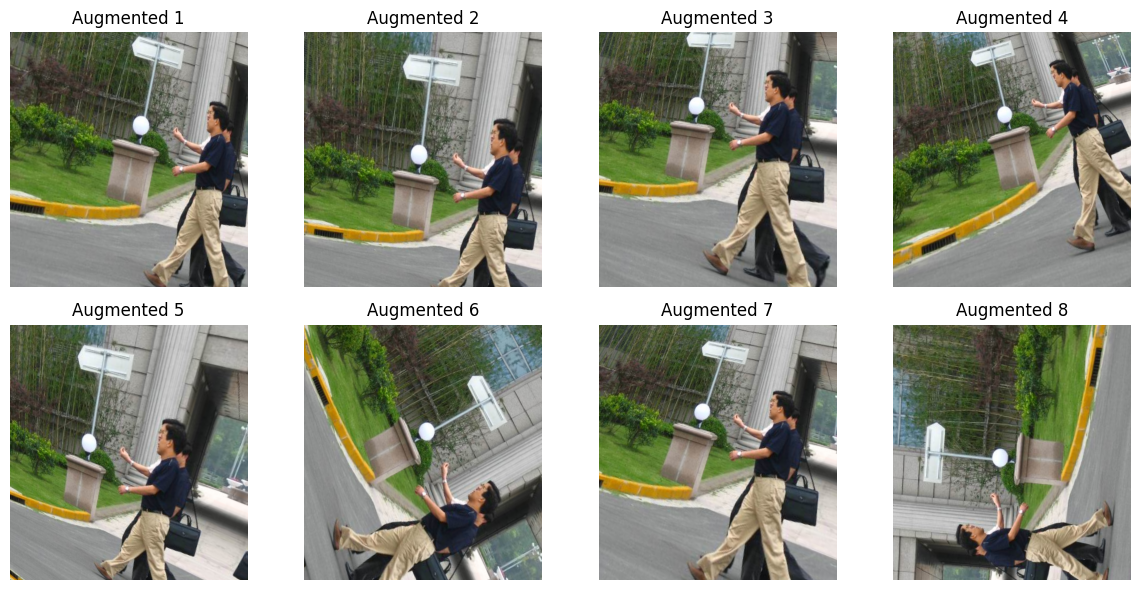

In [35]:
# Install fastai if not already
!pip install -q fastai

# Imports
from fastai.vision.all import *
import matplotlib.pyplot as plt
from pathlib import Path
import os

# ✅ Define actual image path
# Replace with correct path or browse available files
image_folder = Path("/Users/adarshks/Downloads/PennFudanPed/augmented_images_yolo/augmented_images_yolo")  # Or "./augmented" if local
available_images = list(image_folder.glob("*.png"))

if not available_images:
    raise FileNotFoundError(f"No .jpg images found in {image_folder}")

# Just pick the 3rd one if exists, else fallback to the first
img_path = available_images[2] if len(available_images) >= 3 else available_images[0]
print(f"Using image: {img_path.name}")

# ✅ Load image and convert to float tensor [0, 1]
img = PILImage.create(img_path)
img_tensor = ToTensor()(img).float() / 255.0  # Shape: [3, H, W]
img_tensor = img_tensor.unsqueeze(0)          # Shape: [1, 3, H, W]

# ✅ Define augmentation pipeline
aug_pipeline = aug_transforms(
    size=img.size,       # Preserve original size
    do_flip=True,
    flip_vert=True,
    max_rotate=30,
    max_zoom=1.2,
    max_lighting=0.5,
    max_warp=0.2,
    p_affine=1.0,
    p_lighting=1.0
)

# ✅ Wrap in Pipeline
tfms = Pipeline(aug_pipeline)

# ✅ Visualize 8 augmentations
fig, axs = plt.subplots(2, 4, figsize=(12, 6))
for i, ax in enumerate(axs.flatten()):
    aug_img_tensor = tfms(img_tensor.clone())[0]  # Augment and remove batch dim
    show_image(aug_img_tensor, ax=ax, title=f"Augmented {i+1}")
plt.tight_layout()
plt.show()
